In [2]:
# load the covid dataset provided by Johns Hopkins 
import pandas as pd
import numpy as np

path1 = r'C:\Users\chrji\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'
path2 = r'C:\Users\chrji\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_global.csv'
path3 = r'C:\Users\chrji\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_recovered_global.csv'

#### for US states
#path1 = r'C:\Users\chrji\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv'
#path2 = r'C:\Users\chrji\Documents\GitHub\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_deaths_US.csv'


df = pd.read_csv(path1,encoding = "ISO-8859-1", error_bad_lines=False)
Confirmed = df
Deaths = pd.read_csv(path2,encoding = "ISO-8859-1", error_bad_lines=False)
Recovered = pd.read_csv(path3,encoding = "ISO-8859-1", error_bad_lines=False)
Recovered.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29,32,32,32,32,32,40,43,54,99
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,154,165,182,197,217,232,248,251,277,283
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,237,347,405,460,591,601,691,708,783,846
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,58,71,71,128,128,128,169,169,191
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,4,4,4,5,5,5,5


In [3]:
# get a brief description of the data set, replace the nan value with zero
col = df.columns
for ii in range(4, len(col)):   
    df[col[ii]].fillna(0, inplace=True)    
Confirmed = df   
df.info()

#df.describe()
#df['Country/Region'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 91 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/

In [6]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\\chrji\\Anaconda3\\Library\\share"; 

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

%matplotlib inline

def add_colorbar(ax, aspect = 20, pad_fraction = 0.5, labelname = 'Case numbers'):        
        divider = make_axes_locatable(ax)
        width = axes_size.AxesY(ax, aspect=1./aspect)
        pad = axes_size.Fraction(pad_fraction, width)
        cax = divider.append_axes("right", size=width, pad=pad)
        cbar = plt.colorbar(label = labelname, cax=cax,ticks=[0,1,2,3,4,5,6])
        return cbar

def plot_daily_map(date = '3/14/20', region = 'all regions'):
    ax = plt.gca()
    # get the raw map of region
    if region == 'all regions':
        region_data = df        
    else:
        region_data = df.loc[df['Country/Region'] == region]
    
    BBox = (region_data.Lat.min()-10, region_data.Lat.max()+10, region_data.Long.min()-10, region_data.Long.max()+10)  
    #print(BBox)
    m = Basemap(resolution='l', # c for crude, l for low, i for intermediate, h for high, f for full or None
                projection='merc',
                #lat_0=40, lon_0=-110,
                llcrnrlon=BBox[2], llcrnrlat= BBox[0], urcrnrlon=BBox[3] , urcrnrlat=BBox[1])

    m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
    m.fillcontinents(color='grey',alpha = 0.3, lake_color='#A6CAE0')
    m.drawcoastlines(linewidth=0.2, color="white")
    m.drawcountries(color = 'white')

    # plot the scatter points of case numbers above the map, color indicate the numbers
    lon = region_data['Long'].values
    lat = region_data['Lat'].values
    cases = region_data[date].values
    idx = cases>0
    m.scatter(lon[idx], lat[idx], latlon=True,
              c=np.log10(cases[idx]),
              cmap='RdBu_r', alpha=0.8)
    plt.clim(0, 5)
    plt.title('Covid Cases in {} on {}'.format(region, date))
    cbar = add_colorbar(ax)
    cbar.ax.set_yticklabels(['1','10','1e2','1e3','1e4','1e5','1e6'])
    return region_data
    # set the location and size of colorbar
    

C:\Users\chrji\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\chrji\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


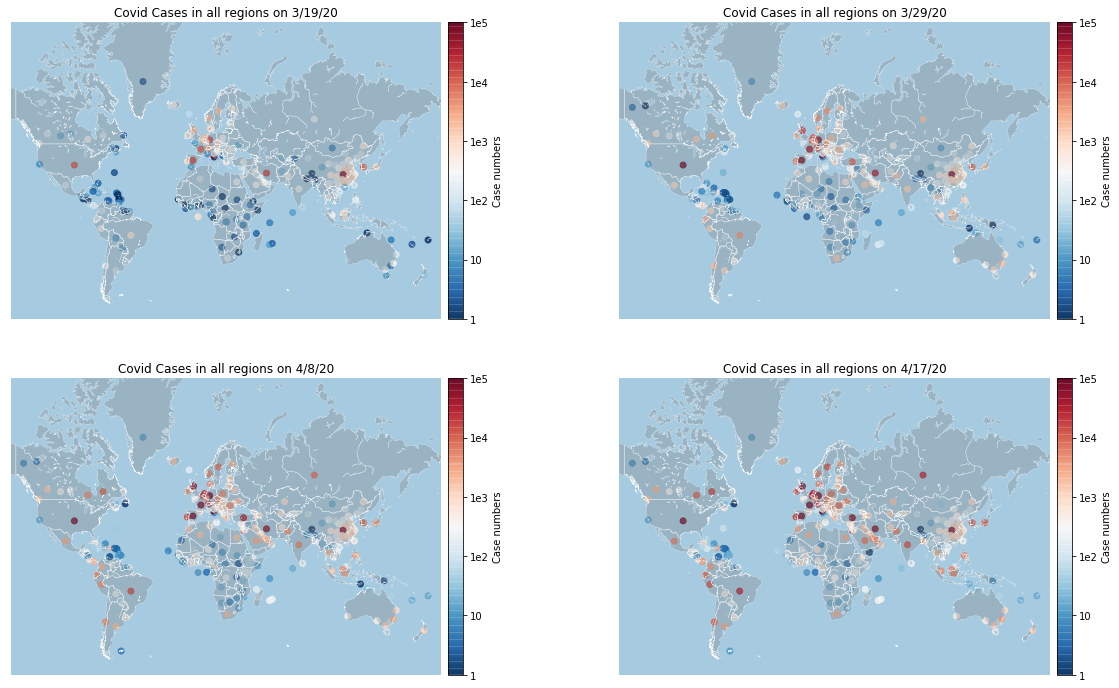

In [8]:
# plot the latest distribution of cases
fig = plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
region_data = plot_daily_map(date = df.columns[-30])  #, region = 'China'
plt.subplot(2,2,2)
region_data = plot_daily_map(date = df.columns[-20])  #, region = 'China'
plt.subplot(2,2,3)
region_data = plot_daily_map(date = df.columns[-10])  #, region = 'China'
plt.subplot(2,2,4)
region_data = plot_daily_map(date = df.columns[-1])  #, region = 'China'


In [23]:
import math
def select_high_risk_country(threshold = [50000]):
    all_countries = set(Confirmed['Country/Region'])
    high_risk_country = []
    tt = np.empty(2)
    tt[0] = threshold[0]
    if len(threshold) == 1:        
        tt[1] = math.inf
    else:
        tt[1] = threshold[1]
    for country in all_countries:
        ctr_data = df.loc[(Confirmed['Country/Region'] == country)].values
        ctr_sum = ctr_data[:,-1].sum(axis = 0)
        
        if (ctr_sum > tt[0]) & (ctr_sum < tt[1]):
            high_risk_country.append(country)                           
    return high_risk_country

def select_high_risk_province(threshold = 2000):
    High_risk_data = Confirmed.loc[Confirmed.values[:, -1]>threshold]
    return High_risk_data['Country/Region'], High_risk_data['Province/State']


In [39]:
select_high_risk_country([30000])
#select_high_risk_province(10000)

['Germany',
 'Spain',
 'France',
 'Netherlands',
 'Brazil',
 'Turkey',
 'Belgium',
 'Canada',
 'US',
 'Russia',
 'China',
 'Italy',
 'United Kingdom',
 'Iran']

Text(0, 0.5, 'Recovered cases')

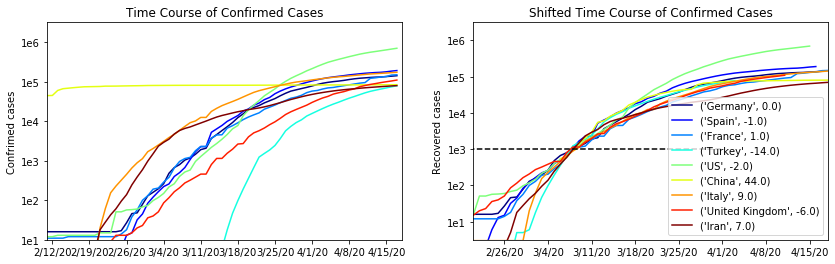

In [40]:
# plot the cumulative curve for several regions showing most cases
from numpy import linspace

def country_curve(data = df , country = 'US', province = np.nan, equalpoint = 100, start = 0, delay = 0, clr = 'r', style = '-'):
    if isinstance(province, str):
        Region_data = data.loc[((df['Country/Region'] == country)&( df['Province/State'] == province))]
    else:
        Region_data = data.loc[(df['Country/Region'] == country)]

    state_value = Region_data.values
    state_sum = state_value[:, 4:].sum(axis = 0).astype(np.float32)    
    diff_equal = abs(state_sum - equalpoint)
    date_equal = np.argmin(diff_equal)    
    onset_date = np.nonzero(state_sum>0)
    state_log = np.zeros(len(state_sum))
    state_log[onset_date[0]] = np.log10(state_sum[onset_date[0]])
    
    date = list(Region_data.columns[4:])
    start = max(start, onset_date[0][0]) # plot start from nonzero date or delay
    xx= list(range(start, len(date)))
    xx_delay = list(map(lambda x:x + delay, xx))
    plt.plot(xx_delay, state_log[start:len(date)], color = clr, linestyle = style)
    #plt.plot(xx_delay, state_sum[start:len(date)], color = clr, linestyle = style)
    return date_equal


def color_palette(ncolor = 20):
    start = 0.0
    stop = 1.0
    number_of_lines=ncolor                   
    cm_subsection = linspace(start, stop, number_of_lines) 
    colors = [plt.cm.jet(x) for x in cm_subsection]
    return colors
def set_tick_labels(xt = 7, yt = 1):
    if xt > 0 & isinstance(xt, int):
        date = list(df.columns[4:])
        idx= np.arange(0,len(date), xt)
        plt.xticks(idx, date[0:len(date):xt])
    if yt == 1:
        plt.yticks(np.arange(8),('1','1e1','1e2','1e3','1e4','1e5','1e6','1e7'))
    
countrys = select_high_risk_country([5e4])
colors = color_palette(len(countrys))
date = list(df.columns[4:])

# plot the time course of confirmed and recovered cases
fig = plt.figure(figsize = (14, 4))  
plt.subplot(1,2,1)
date_equal = np.zeros(len(countrys))

aligned_point = 1000
for ii in range(len(countrys)):
    date_equal[ii] = country_curve(data = Confirmed, equalpoint = aligned_point, country = countrys[ii], clr =colors[ii]) #province = provinces[ii], 
plt.title('Time Course of Confirmed Cases')
plt.ylabel('Confrimed cases')
set_tick_labels()
plt.ylim(1,6.5)
plt.xlim(20, len(date))


plt.subplot(1,2,2)
idx0 = countrys.index(countrys[0])
Italy_reference = date_equal[idx0]
shifts = list(Italy_reference - date_equal)
for ii in range(len(countrys)):
    country_curve(data = Confirmed, country = countrys[ii], delay = shifts[ii], clr =colors[ii]) #province = provinces[ii], 
set_tick_labels(xt = 7)
plt.plot([0, 70], [np.log10(aligned_point), np.log10(aligned_point)], 'k--')
plt.xlim(30, len(date))
plt.ylim(0.5, 6.5)
shift_days = list(zip(countrys,shifts))
plt.legend(shift_days)
plt.title('Shifted Time Course of Confirmed Cases')   
plt.ylabel('Recovered cases')


In [31]:
def diff_adjacent(xx, step = 1):
    diff = []
    for ii in range(step, len(xx)):
        diff.append(xx[ii]-xx[ii-step])
    return np.array(diff)

def get_country_log(data = df , countrys = ['US']):
    country_log_data = []
    for country in countrys:
        Region_data = data.loc[(df['Country/Region'] == country)]
        state_value = Region_data.values
        state_sum = state_value[:, 4:].sum(axis = 0).astype(np.float32)          
        onset_date = np.nonzero(state_sum>0)
        state_log = np.zeros(len(state_sum))
        state_log[onset_date[0]] = np.log2(state_sum[onset_date[0]])
        country_log_data.append(state_log)
    return country_log_data

Text(0, 0.5, 'log2(New/Old)')

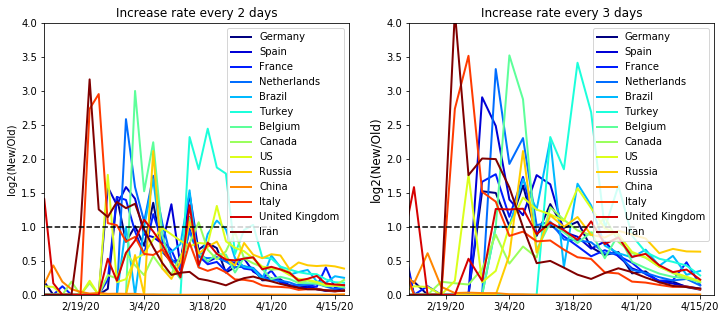

In [33]:
high_risk_countrys = select_high_risk_country([30000])
colors = color_palette(len(high_risk_countrys))
country_log_value = get_country_log(data = Confirmed, countrys=high_risk_countrys)

fig = plt.figure(figsize = (12, 5)) 
plt.subplot(1,2,1)
for ii in range(len(high_risk_countrys)):    
    data = np.convolve(country_log_value[ii], [1],'same')  #[0.2,0.2,0.2, 0.2, 0.2]
    step = 2
    increase = diff_adjacent(data, step)
    xx= np.arange(step,len(data), step)    
    plt.plot(xx, increase[::step], color = colors[ii], linewidth=2.0, linestyle='-')
plt.plot([0, 70], [1, 1], 'k--')
set_tick_labels(xt = 14, yt = 0)
plt.xlim(20, len(date))
plt.ylim(0, 4)
plt.legend(high_risk_countrys)
plt.title('Increase rate every {} days'.format(step))
plt.ylabel('log2(New/Old)')

plt.subplot(1,2,2)
for ii in range(len(high_risk_countrys)):    
    data = np.convolve(country_log_value[ii], [1],'same') #[0.2,0.2,0.2, 0.2, 0.2]
    step = 3
    increase = diff_adjacent(data, step)
    xx= np.arange(step,len(data),step)
    plt.plot(xx[:], increase[0:-1:step], color = colors[ii], linewidth=2.0, linestyle ='-')
plt.plot([0, 70], [1, 1], 'k--')
set_tick_labels(xt = 14, yt = 0)
plt.xlim(20, len(date))
plt.ylim(0, 4)
plt.legend(high_risk_countrys)
plt.title('Increase rate every {} days'.format(step))
plt.ylabel('log2(New/Old)',fontsize = 12)

(0, 120000)

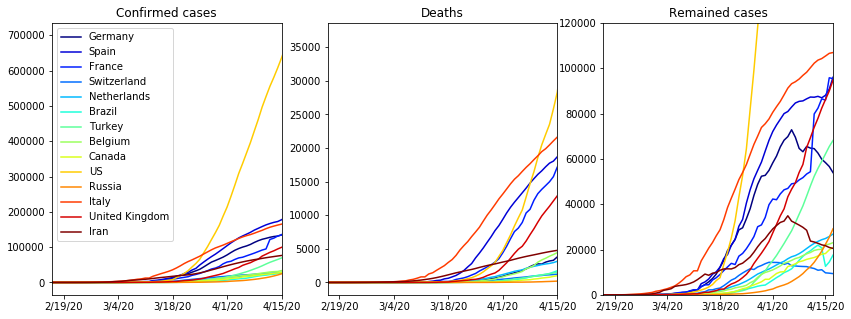

In [34]:
def recover_rate(countrys):
    Remain_cases = []
    Recover_cases = []
    Death_cases = []
    Confirm_cases = []
    for country in countrys:
        confirm_data = Confirmed.loc[(Confirmed['Country/Region'] == country)].values
        confirm_sum = confirm_data[:,4:].sum(axis = 0)
        Confirm_cases.append(confirm_sum)
        recover_data = Recovered.loc[(Recovered['Country/Region'] == country)].values
        recover_sum = recover_data[:,4:].sum(axis = 0)
        Recover_cases.append(recover_sum)
        death_data = Deaths.loc[(Deaths['Country/Region'] == country)].values
        death_sum = death_data[:,4:].sum(axis = 0)
        Death_cases.append(death_sum)
        remain_num = confirm_sum - recover_sum - death_sum
        Remain_cases.append(remain_num)
        #recover_rate = np.zeros(len(confirm_sum))
        #idx = confirm_sum>0
        #recover_rate[idx] = recover_sum[idx]  # /confirm_sum[idx]
        #Recover_ratio.append(recover_rate)
    return Recover_cases, Remain_cases, Confirm_cases, Death_cases

countrys = select_high_risk_country([20000])
countrys.remove('China')
colors = color_palette(len(countrys))
date = Confirmed.columns[4:] 
recover_cases, remain_cases, confirm_cases, death_cases = recover_rate(countrys)
    
plt.figure(figsize = (14, 5))
plt.subplot(1,3,1)
ii = 0
for cc in confirm_cases:   
    plt.plot(date, cc, color = colors[ii])
    ii += 1
set_tick_labels(xt = 14, yt = 0)
plt.legend(countrys)
plt.xlim(25, xx[-1])
plt.title('Confirmed cases')

plt.subplot(1,3,2)
ii = 0
for dc in death_cases:
    #rc[rc>0] = np.log10(rc[rc>0].astype(np.float32))
    plt.plot(date, dc, color =colors[ii])
    ii += 1
set_tick_labels(xt = 14, yt = 0)
plt.xlim(25, xx[-1])
plt.title('Deaths')

plt.subplot(1,3,3)
ii = 0
for rc in remain_cases:
    #new_cases = diff_adjacent(cc)
    #new_cases[new_cases>0] = np.log10(new_cases[new_cases>0].astype(np.float32))
    xx= np.arange(len(date))
    plt.plot(xx, rc, color =colors[ii])
    ii += 1
set_tick_labels(xt = 14, yt = 0)
plt.title('Remained cases')
plt.xlim(25, xx[-1])
plt.ylim([0, 120000])
     

In [35]:
from countryinfo import CountryInfo

## correct the expression of several countrys' names
country_rename = countrys
if 'Korea, South' in countrys:
    country_rename[countrys.index('Korea, South') ] = 'South Korea'
if 'US' in countrys:
    country_rename[countrys.index('US')] = 'United States'


Text(0.5, 1.0, 'Confirmed density')

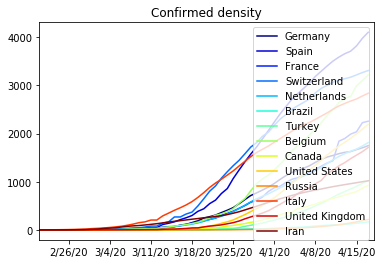

In [37]:
# get the population of different contries and plot the case_density
areas = np.zeros(len(country_rename))
populations = np.zeros(len(country_rename))
for ii in range(len(country_rename)):
    country_data = CountryInfo(country_rename[ii])
    areas[ii] = country_data.area()
    populations[ii] = country_data.population()
    
    confirmed_density = confirm_cases[ii]/populations[ii]*10**6
    plt.plot(date, confirmed_density, color = colors[ii])

set_tick_labels(xt = 7, yt = 0)
plt.legend(countrys)
plt.xlim(30, len(date))
plt.title('Confirmed density')
